## 목차
* [numpy ndarray](#1)
    * [array 생성](#1.1)
    * [array 자료형](#1.2)
    * [array와 scalar 연산](#1.3)
    * [indexing/slicing](#1.4)
    * [boolean indexing](#1.5)
    * [fancy indexing](#1.6)
    * [array transpose/swapaxes](#1.7)
* [universial function](#2)
* [array를 이용한 데이터 처리](#3)
    * [array 연산으로 조건절 표현](#3.1) 
    * [수학 메서드와 통계 메서드](#3.2)
    * [불리언 array 메서드](#3.3)
    * [정렬](#3.4)
* [선형대수](#4)
* [array 조작](#5)
    * [reshape](#5.1)
    * [array 이어붙이고 나누기](#5.2)
* [브로드캐스팅](#6)
---

<a id='1'></a>
### 1. NumPy ndarray : 다차원 배열 객체
* 배열의 모든 원소는 같은 자료형이어야 한다

<a id='1.1'></a>
#### 1.1 array 생성 [클릭](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html#routines-array-creation)

* 1.1.1 array 함수 이용
    * 입력 데이터 (리스트, 튜플, 배열 등)를 array로 변환

In [4]:
import numpy as np
data1 = np.array(
           [1,2]
        )

In [2]:
data2 = np.array([
           (1,2), # tuple
           [3,4], # list
           np.array([5, 6]) # array
        ])

In [3]:
print('data1 dimension : {}'.format(data1.ndim))
print('data2 dimension : {}'.format(data2.ndim))

data1 dimension : 1
data2 dimension : 2


In [4]:
print('data1 shape : {}'.format(data1.shape))
print('data2 shape : {}'.format(data2.shape))

data1 shape : (2,)
data2 shape : (3, 2)


* 1.1.2 ones 함수
    * 모든 원소를 1로 갖는 배열 생성

In [6]:
np.ones((2,2))

array([[ 1.,  1.],
       [ 1.,  1.]])

* 1.1.3 zeros 함수
    * 모든 원소를 0으로 갖는 배열 생성

In [16]:
# column이 없어서 안생긴다
np.zeros((3,0))

array([], shape=(3, 0), dtype=float64)

* 1.1.4 empty 함수
    * 배열을 생성하지만 값을 초기화하지 않는다

In [17]:
np.empty((3, 2))

array([[  6.93904295e-310,   2.87730315e-316],
       [  4.36913713e-317,   6.93901285e-310],
       [  6.93901231e-310,   6.93901285e-310]])

* 1.1.5 eye, identity 함수
    * N * N 단위 행렬 생성

In [20]:
np.eye(3, k=-1)

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]])

In [19]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

* 1.1.6 arange 함수
    * list의 range와 비슷한 기능을 하지만 ndarray 형태로 반환

In [24]:
assert list(range(3)) == list(np.arange(3))

<a id='1.2'></a>
#### 1.2 array 자료형 [클릭](https://www.tutorialspoint.com/numpy/numpy_data_types.htm)

* array 생성시 명시

In [25]:
data3 = np.array([1,2], dtype=np.float64)
data4 = np.array([1,2], dtype=np.int32)

In [26]:
print('data3 dtype : {}'.format(data3.dtype))
print('data4 dtype : {}'.format(data4.dtype))

data3 dtype : float64
data4 dtype : int32


* array 생성 후 변경

In [27]:
print('data3 dtype was : {}'.format(data3.dtype))
data3 = data3.astype(np.int32)
print('data3 dtype is : {}'.format(data3.dtype))

data3 dtype was : float64
data3 dtype is : int32


<a id='1.3'></a>
#### 1.3 array와 scalar 간 연산

* array는 for loop를 이용하지 않고 데이터를 일괄처리 (벡터화)

In [28]:
data5 = np.array([
    [1,2],
    [3,4]
])

* array 간 연산
    * 단, 2차원 array가 행렬 형태이긴 해도 * 연산자는 element-wise이다.

In [29]:
data5 * data5

array([[ 1,  4],
       [ 9, 16]])

* array와 scalar 간 연산
    * list에서는 같은 방식으로는 element-wise가 안된다
        * 주의점은 * 연산자는 뒤 숫자만큼 원소가 복사된다

In [32]:
data5 * 2 # broadcasting 

array([[2, 4],
       [6, 8]])

In [34]:
data6 = [1,2,3,4]
data6 * 2

[1, 2, 3, 4, 1, 2, 3, 4]

<a id='1.4'></a>
#### 1.4 indexing과 slicing

* 1차원 array

In [37]:
data7 = np.arange(10)
data7

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
print(repr(data7[0])) # indexing
print(repr(data7[0:2])) # slicing

0
array([0, 1])


* 다차원 array

In [45]:
data9 = np.array([
    [1,2,3],
    [4,5,6],
])

In [54]:
print(data9[0][1]) # same as below
print(data9[0, 1])

2
2


In [53]:
from skimage import io
link = "http://i2.wp.com/www.archaeopy.org/wp-content/uploads/2014/06/indexing-elments.jpg?resize=257%2C221"
io.imshow(io.imread(link))
io.show()

AttributeError: module 'io' has no attribute 'imshow'

In [55]:
data9[:, 0] # ':' => 전체 축

array([1, 4])

* slicing에서 주의할 점
    * array 조각은 원본 array의 view이다. (리스트와는 달리 데이터 복사 x)
    * NumPy는 대용량 데이터 처리를 위해 설계되었기 때문에 데이터 복사가 남발되면 성능 저하
    * 만약 복사본 필요하면 data[:5].copy() 처럼 명시적으로 할 것

In [56]:
# list
a = list(range(10))
b = a[:5]
print('데이터 수정 전 a', repr(a))
print('데이터 수정 전 b', repr(b))
a[:5] = [100] * 5
print('데이터 수정 후 a', repr(a))
print('데이터 수정 후 b', repr(b))

데이터 수정 전 a [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
데이터 수정 전 b [0, 1, 2, 3, 4]
데이터 수정 후 a [100, 100, 100, 100, 100, 5, 6, 7, 8, 9]
데이터 수정 후 b [0, 1, 2, 3, 4]


In [57]:
# array
c = np.arange(10)
d = c[:5]
print('데이터 수정 전 c', repr(c))
print('데이터 수정 전 d', repr(d))
c[:5] = 100
print('데이터 수정 후 c', repr(c))
print('데이터 수정 후 d', repr(d))

데이터 수정 전 c array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
데이터 수정 전 d array([0, 1, 2, 3, 4])
데이터 수정 후 c array([100, 100, 100, 100, 100,   5,   6,   7,   8,   9])
데이터 수정 후 d array([100, 100, 100, 100, 100])


<a id='1.5'></a>
#### 1.5 boolean indexing

In [58]:
data10 = np.random.randn(4,4) # 표준 정규 분포 데이터
data10

array([[ 2.07307055, -1.44009787, -0.63440041,  1.11681985],
       [-0.75962733,  0.81816148,  0.38110698, -0.38556308],
       [ 0.3661368 , -0.94535478, -0.82695354, -0.24561309],
       [-0.11996604, -0.49102064, -0.22734235, -1.38372398]])

In [59]:
data10 > 0.6

array([[ True, False, False,  True],
       [False,  True, False, False],
       [False, False, False, False],
       [False, False, False, False]], dtype=bool)

#### 신경망 마지막 정확도 계산 시 == 활용

In [60]:
data10[data10>0.6] # 주의할 점은 1차원 array로 return

array([ 2.07307055,  1.11681985,  0.81816148])

In [63]:
data10[(data10>0.6) | (data10<0.01)] # 'and', 'or'는 안된다

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [64]:
data10[(data10>0.6) | (data10<0.01)] = 1
data10

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  0.38110698,  1.        ],
       [ 0.3661368 ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

<a id='1.6'></a>
#### 1.6 fancy indexing (정수배열을 사용한 indexing)

In [5]:
data11 = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10, 11, 12]
])

In [66]:
data11[
    [3, 0, 2, 1]
] # row 순서 변경

array([[10, 11, 12],
       [ 1,  2,  3],
       [ 7,  8,  9],
       [ 4,  5,  6]])

In [67]:
data11[
    [3, 0, 2, 1], # row
    [0, 1, 2, 1]  # column
]                 # 이 아니다 (3,0), (0, 1), (2, 2), (1, 1)이 선택됨

array([10,  2,  9,  5])

In [7]:
data11[[3, 0, 2, 1]][:, [0, 1, 2, 1]] # row, column

array([[10, 11, 12, 11],
       [ 1,  2,  3,  2],
       [ 7,  8,  9,  8],
       [ 4,  5,  6,  5]])

<a id='1.7'></a>
#### 1.7 array transpose와 축 바꾸기

* transpose는 데이터를 복사하지 않고 데이터 모양이 바뀐 view를 반환
* 축 번호를 받아서 치환도 가능

In [70]:
data12 = np.array([[1,2,3], [4,5,6]])
data12

array([[1, 2, 3],
       [4, 5, 6]])

In [71]:
data12.T # data12.transpose()도 같은 기능

array([[1, 4],
       [2, 5],
       [3, 6]])

In [75]:
data12.transpose((1,0))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [73]:
data12.swapaxes(1,0)

array([[1, 4],
       [2, 5],
       [3, 6]])

---

<a id='2'></a>
### 2 universial function [클릭](https://docs.scipy.org/doc/numpy/reference/ufuncs.html)

* 데이터 원소별로 연산 수행

In [76]:
data13, data14 = np.arange(3), np.arange(3,6)

In [77]:
np.sqrt(data13) # element-wise 연산

array([ 0.        ,  1.        ,  1.41421356])

In [78]:
np.exp(data13)

array([ 1.        ,  2.71828183,  7.3890561 ])

In [79]:
np.maximum(data13, data14) # element-wise 비교

array([3, 4, 5])

---

<a id='3'></a>
### 3. array를 이용한 데이터 처리

* 반복문 작성하지 않고 간결한 array 연산 (벡터화)을 통해 데이터 처리 가능

<a id='3.1'></a>
#### 3.1 array 연산으로 조건절 표현

In [83]:
data15 = np.random.randn(5)
np.where(data15>0, 'pos', 'neg')

array(['neg', 'pos', 'neg', 'pos', 'neg'], 
      dtype='<U3')

<a id='3.2'></a>
#### 3.2 수학 메서드와 통계 메서드 [클릭](https://docs.scipy.org/doc/numpy/reference/routines.math.html)

* 1차원

In [84]:
assert data15.mean() == np.mean(data15)
assert data15.sum() == np.sum(data15)

* n차원

In [87]:
data16 = np.array([
    [1,2,3],
    [4,5,6]
])

In [88]:
print('axis 0 : {}'.format(repr(np.sum(data16, axis=0)))) # np.sum(data16, axis=0)
print('axis 1 : {}'.format(repr(np.sum(data16, axis=1)))) # np.sum(data16, axis=1)

axis 0 : array([5, 7, 9])
axis 1 : array([ 6, 15])


<a id='3.3'></a>
#### 3.3 불리언 array 메서드

In [89]:
print('axis 0 : {}'.format(repr(np.sum((data16>=3).sum(axis=0))))) # np.sum((data16>=3).sum(axis=0))
print('axis 1 : {}'.format(repr(np.sum((data16>=3).sum(axis=1))))) # np.sum((data16>=3).sum(axis=1)

axis 0 : 4
axis 1 : 4


In [91]:
print('at least one element is greater than 3 : {}'.format((data16>3).any()))
print('all elements are greater than 3 : {}'.format((data16>3).all()))

at least one element is greater than 3 : True
all elements are greater than 3 : False


<a id='3.4'></a>
#### 3.4 정렬

* 1차원

In [92]:
data17 = np.array([5, 1, 7, 3, 4])
data17.sort() # axis = 0
data17

array([1, 3, 4, 5, 7])

* n차원

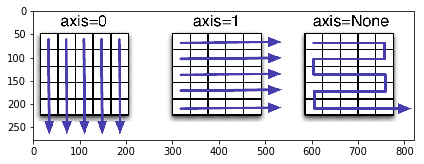

In [93]:
from skimage import io
link = "http://using-python-in-research.site44.com/_images/axis.png"
io.imshow(io.imread(link))
io.show()

In [94]:
data18 = np.array([
    [10,2,33],
    [4,3,6]
])
data18.sort(1)
data18

array([[ 2, 10, 33],
       [ 3,  4,  6]])

In [95]:
data18 = np.array([
    [10,2,33],
    [4,3,6]
])
data18.sort(0)
data18

array([[ 4,  2,  6],
       [10,  3, 33]])

<a id='4'></a>
### 4. 선형대수

* 주의할 점은 * 연산자는 element-wise 연산을 수행한다는 점이다
    * 2차 array 같은 경우 형태가 행렬이지만 실제 연산은 element-wise
    * 행렬 연산 수행할 경우에는 np.dot을 사용

In [96]:
data19 = np.array([
    [1,2],
    [3,4]
])

* element-wise 연산

In [97]:
data19 * data19

array([[ 1,  4],
       [ 9, 16]])

* 행렬 형태 곱

In [98]:
np.dot(data19, data19)

array([[ 7, 10],
       [15, 22]])

* 행렬 분할, 역행렬, 행렬식 등 [클릭](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

In [99]:
from numpy.linalg import inv

In [100]:
data20 = np.array([
    [1,2],
    [3,4]
])
data20

array([[1, 2],
       [3, 4]])

In [101]:
inv(data20)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

<a id='5'></a>
### 5. array 조작

<a id='5.1'></a>
#### 5.1 reshape

In [110]:
data21 = np.arange(12)
#data21

In [111]:
data21.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [112]:
#data21.reshape(4, -1)

In [113]:
data21.reshape(3,4).flatten() # 원본 데이터 복사본 생성 x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [114]:
data21.reshape(3,4).ravel() # 원본 데이터 복사본 생성

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

<a id='5.2'></a>
#### 5.2 array 이어붙이고 나누기

* 이어붙이기

In [115]:
data22 = np.array([[1,2], [3,4]])
data23 = np.array([[5,6], [7,8]])

In [116]:
np.concatenate([data22, data23], axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [117]:
np.concatenate([data22, data23], axis=0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [118]:
np.hstack((data22, data23))

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [119]:
np.vstack((data22, data23))

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

* 나누기

In [122]:
data24 = np.arange(8)
data24

array([0, 1, 2, 3, 4, 5, 6, 7])

In [123]:
data25, data26 = np.split(data24, 2)
print('data25 : {}'.format(repr(data25)))
print('data26 : {}'.format(repr(data26)))

data25 : array([0, 1, 2, 3])
data26 : array([4, 5, 6, 7])


In [125]:
data27, data28, data29 = np.split(data24, [2,5])
print('data27 : {}'.format(repr(data27))) # data24[:2]
print('data28 : {}'.format(repr(data28))) # data24[2:5]
print('data29 : {}'.format(repr(data29))) # data24[5:]

data27 : array([0, 1])
data28 : array([2, 3, 4])
data29 : array([5, 6, 7])


<a id='6'></a>
### 6. 브로드캐스팅

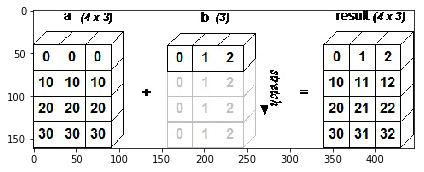

In [126]:
from skimage import io
link = 'https://www.tutorialspoint.com/numpy/images/array.jpg'
io.imshow(io.imread(link))
io.show()

In [127]:
data30 = np.array([
    [0,0,0],
    [10,10,10],
    [20,20,20],
    [30,30,30]
])

In [128]:
data30 + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [129]:
data30 + np.arange(4).reshape(4,1) # np.array([[0], [1], [2], [3]])

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])